# Titanic

Download link : https://www.kaggle.com/c/titanic/data

Dacon : https://dacon.io/competitions/open/235539/codeshare

1. train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
- PassengerID : 탑승객 고유 아이디
- Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
- Parch : 함께 탐승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

EDA
1. Survived
1. Pclass
2. Sex
3. Sex & Pclass
5. Age
4. Pclass, Sex, Age
5. Embarked
6. Failt
7. Fare
8. 안한거 : Name, Ticket, Cabin

# 01. settings

In [1]:
# 가상환경에서 사이킷런 설치
# > conda install scikit-learn

In [ ]:
# missingno 설치
# > conda install missingno

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 02. Import Data

In [3]:
df_train = pd.read_csv('data_k/train.csv')
df_test = pd.read_csv('data_k/test.csv')

In [4]:
print(df_train.shape)
df_train.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df_test.shape)
df_test.head(5)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
for col in df_train.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:   Survived/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 19.87%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.00%
column:      Cabin/t Percent of NaN value: 77.10%
column:   Embarked/t Percent of NaN value: 0.22%


In [13]:
for col in df_test.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 20.57%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.24%
column:      Cabin/t Percent of NaN value: 78.23%
column:   Embarked/t Percent of NaN value: 0.00%


<AxesSubplot:>

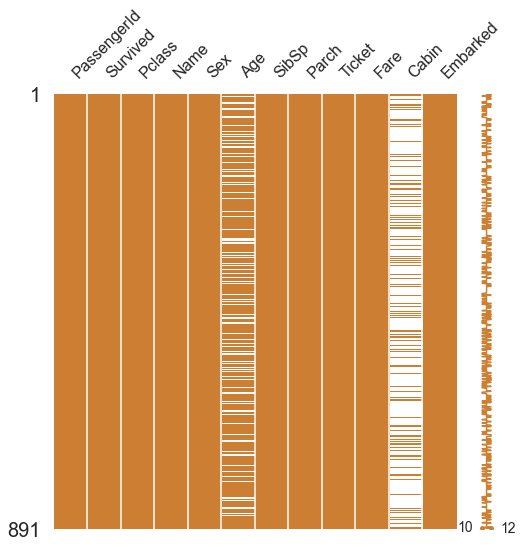

In [14]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

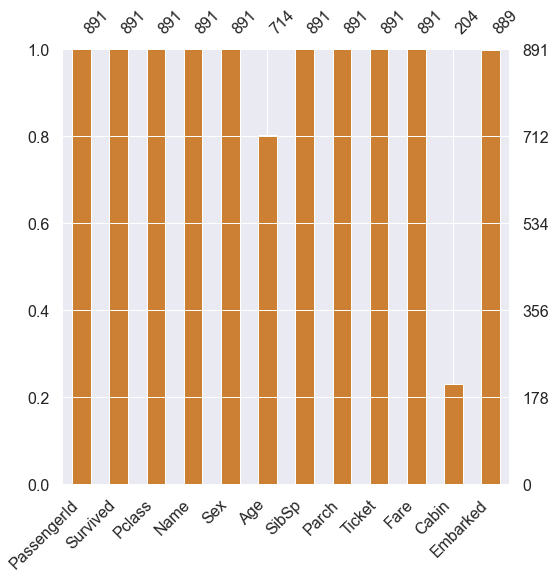

In [15]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

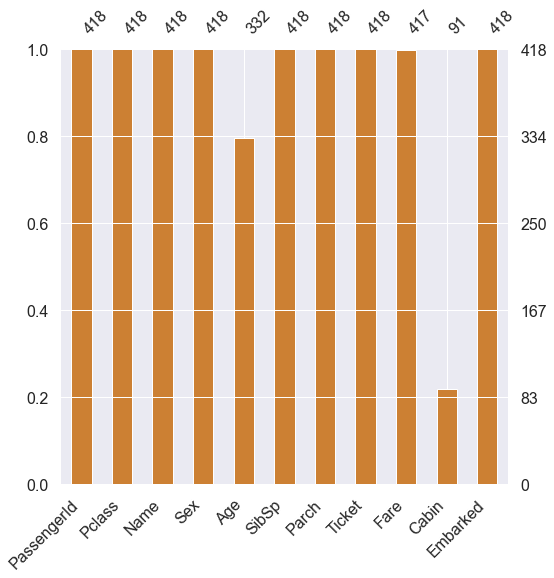

In [16]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# 03. EDA

### 0. Survived

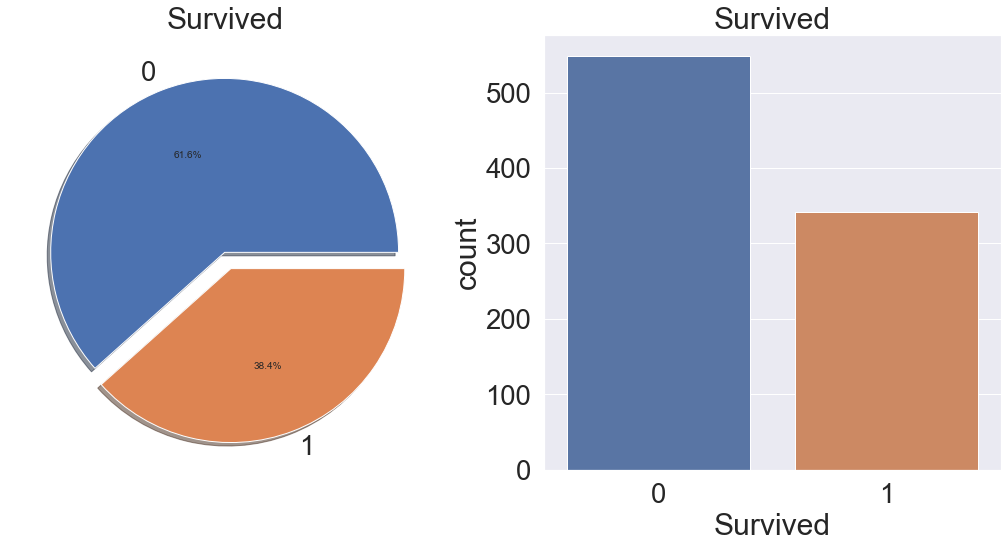

In [17]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 생존하지 못한 사람이 많은것을 알 수 있다.

### 1. Pclass
- 클래스별로 생존율이 어떻게 달라지는지 확인

In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

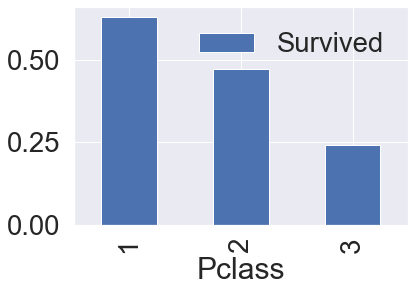

In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- grouped 객체에 mean()을 해서 각 클래스별 생존율을 알아봄

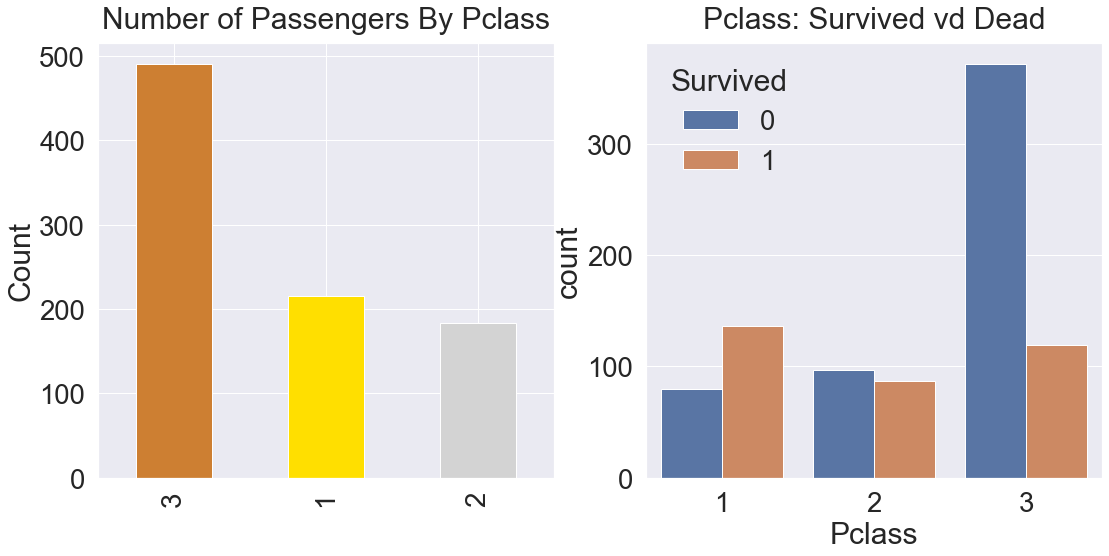

In [22]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vd Dead', y=y_position)
plt.show()

- 클래스가 높을수록 살아남을 확률이 높았다.
- 3클래스는 생존율이 낮았다..

### 2. Sex
- 성별로 생존율이 어떻게 달라지는 지 확인

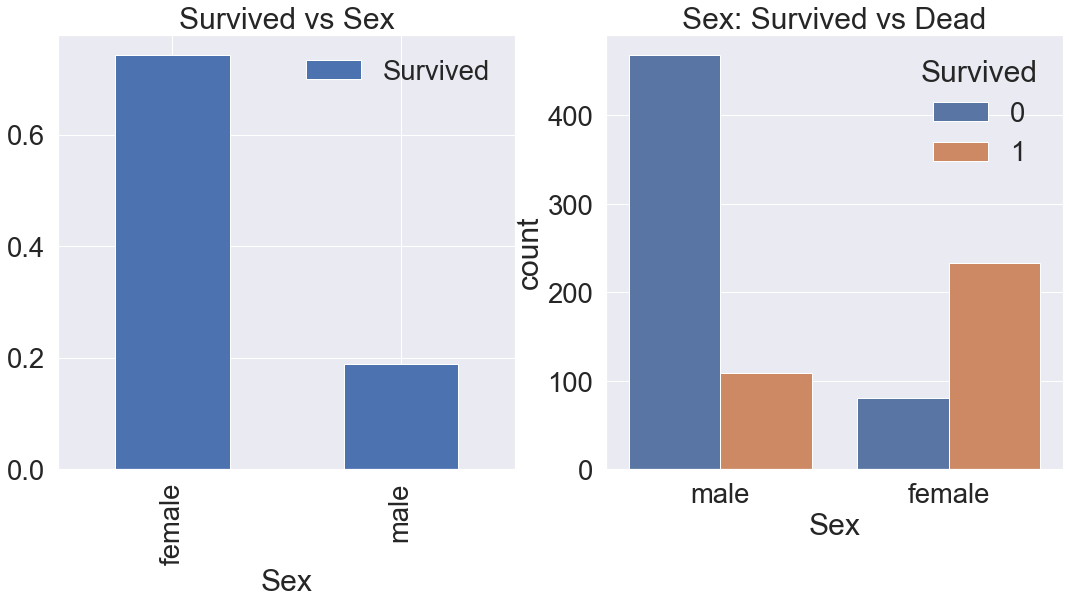

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Sex'>

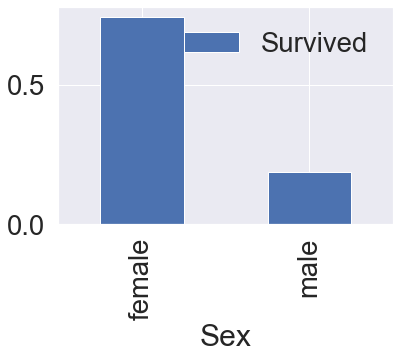

In [24]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [25]:
df_train[['Sex','Survived']].groupby(['Sex']).mean()
# df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [50]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 성별만을 보았을 때에는 여자가 남자보다 살아남은 비율이 높았다.

### 3. Both Sex and Pclass
- Sex, Pclass 두가지에 관해서 생존율이 어떻게 달라지는지 확인

In [63]:
pd.crosstab([df_train['Sex'], df_train['Survived']], df_train['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

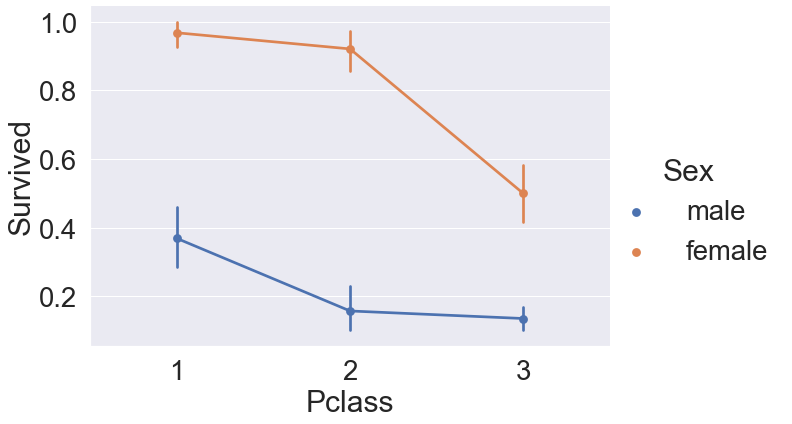

In [52]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

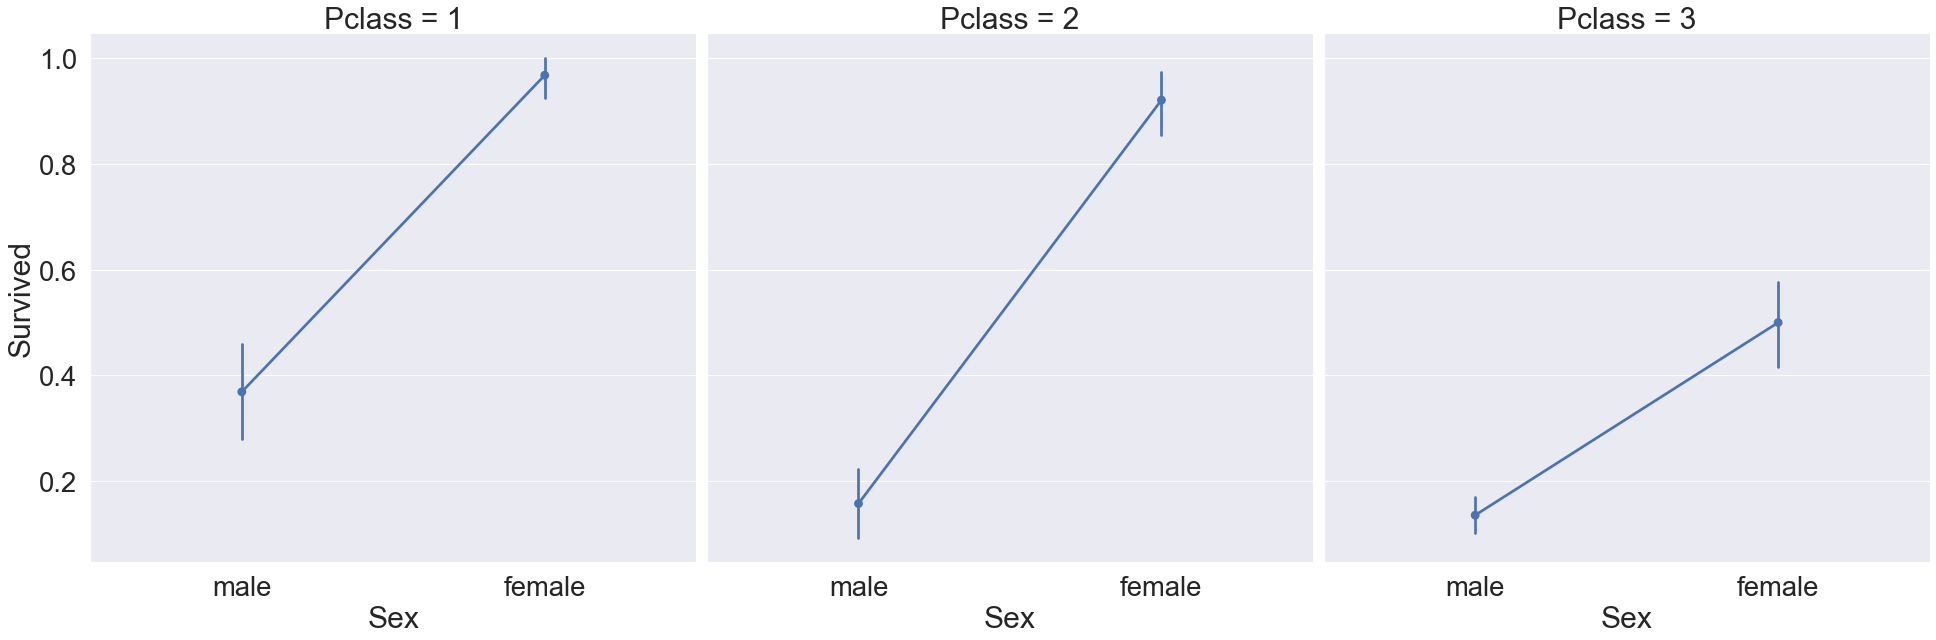

In [59]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

- 클래스 여부와 상관없이 여성이 다 많이 살아남았다.
- 그러나 3등급에서 살아남은 여성의 수가 1, 2등급보다 적다

### 4. Age
- 연령별 생존율을 확인한다

In [64]:
print('제일 나이 많은 탑승객 : {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} 세'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} 세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 세
제일 어린 탑승객 : 0.4 세
탑승객 평균 나이 : 29.7 세


- 생존에 따른 Age의 histogram
- Kernel Density Estimatio(DKE) 커널 밀도 추정

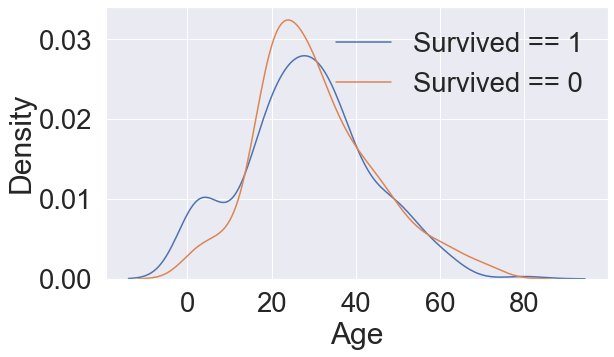

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

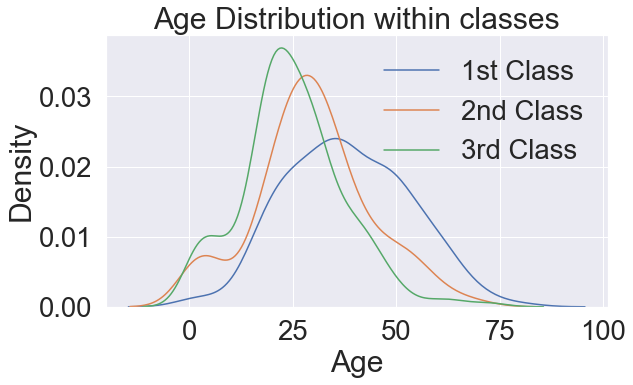

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], ax=ax)

# plt.figure(figsize=(8, 6))
# df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
# df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
# df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

- class가 높아질수록 나이많은 사람들의 비중이 높아진다.

### 05. Pclass, Sex, Age
- Pclass, Sex, Age, survived 다수의 컬럼을 쉽게 그려주는 violinplot으로 확인

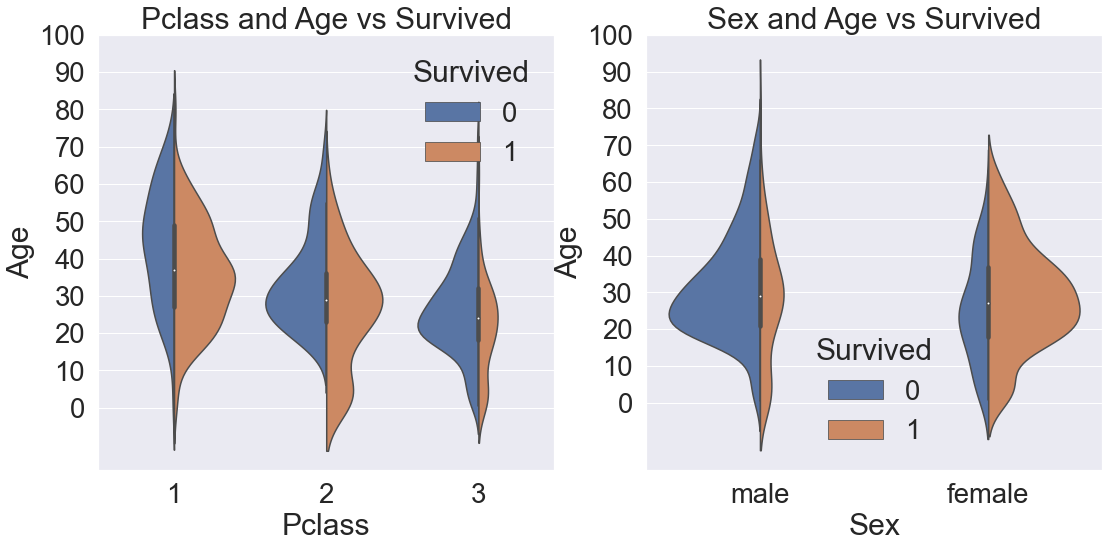

In [192]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [191]:
# y_position = 1.02
# f, ax = plt.subplots(nrows=4, figsize=(18, 20))
# sns.kdeplot('Age', hue='Survived', data=df_train, ax=ax[0])
# ax[0].set_title('Pclass: Survived vd Dead', y=y_position)
# sns.kdeplot('Age', hue='Survived', data=df_train[df_train['Pclass']==1], ax=ax[1])
# ax[1].set_title('1 Pclass: Survived vd Dead', y=y_position)
# sns.kdeplot('Age', hue='Survived', data=df_train[df_train['Pclass']==2], ax=ax[2])
# ax[2].set_title('2 Pclass: Survived vd Dead', y=y_position)
# sns.kdeplot('Age', hue='Survived', data=df_train[df_train['Pclass']==3], ax=ax[3])
# ax[3].set_title('3 Pclass: Survived vd Dead', y=y_position)
# plt.tight_layout()
# plt.show()

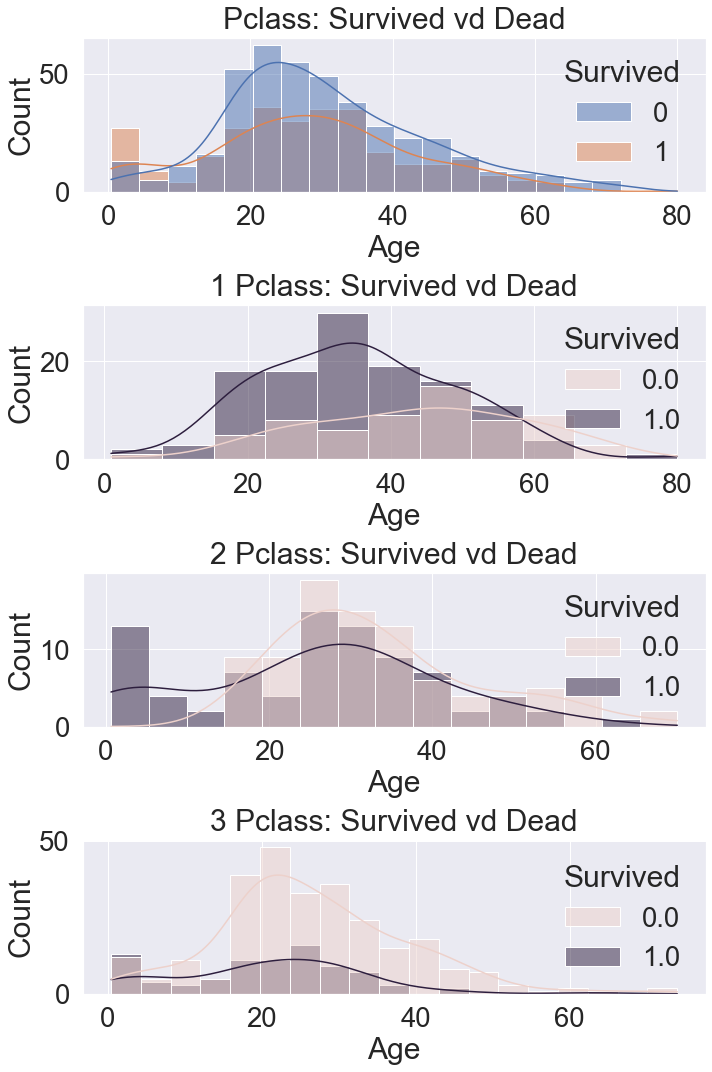

In [195]:
# Pclass별 연령별 생존율
y_position = 1.02
f, ax = plt.subplots(nrows=4, figsize=(10, 15))
# sns.countplot('Age', hue='Survived', data=df_train, ax=ax[0])
# ax[0].set_title('Pclass: Survived vd Dead', y=y_position)
# sns.countplot('Age', hue='Survived', data=df_train[df_train['Pclass']==1], ax=ax[1])
# ax[1].set_title('1 Pclass: Survived vd Dead', y=y_position)
# sns.countplot('Age', hue='Survived', data=df_train[df_train['Pclass']==2], ax=ax[2])
# ax[2].set_title('2 Pclass: Survived vd Dead', y=y_position)
# sns.countplot('Age', hue='Survived', data=df_train[df_train['Pclass']==3], ax=ax[3])
# ax[3].set_title('3 Pclass: Survived vd Dead', y=y_position)

# sns.histplot(df_train[df_train['Survived']==1]['Age'], label='all', color = 'blue', kde=True, ax=ax[0])
# sns.histplot(df_train[df_train['Survived']==0]['Age'], label='all', color = 'red', kde=True, ax=ax[0])

sns.histplot(data = df_train, x=df_train['Age'], hue='Survived', kde=True, ax=ax[0])
ax[0].set_title('Pclass: Survived vd Dead', y=y_position)
sns.histplot(data = df_train[df_train['Pclass']==1], x=df_train['Age'], hue='Survived', kde=True, ax=ax[1])
ax[1].set_title('1 Pclass: Survived vd Dead', y=y_position)
sns.histplot(data = df_train[df_train['Pclass']==2], x=df_train['Age'], hue='Survived', kde=True, ax=ax[2])
ax[2].set_title('2 Pclass: Survived vd Dead', y=y_position)
sns.histplot(data = df_train[df_train['Pclass']==3], x=df_train['Age'], hue='Survived', kde=True, ax=ax[3])
ax[3].set_title('3 Pclass: Survived vd Dead', y=y_position)

plt.tight_layout()
plt.show()

\* Pclass 별 연령별 생존율 \*
- 아이를 데려온 가정은 1클래스보다 2, 3클래스를 많이이용한 것 같다
- 1클래스는 생존율이 높은데 그중 젊은층의 생존율이 높은것 같다.

### 06. Embarked
- 탑승한곳에 따른 생존율

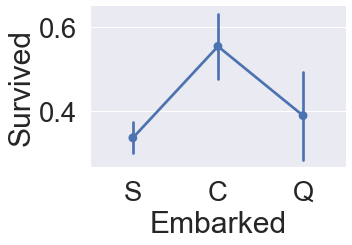

In [335]:
sns.factorplot('Embarked', 'Survived', data=df_train)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

<AxesSubplot:xlabel='Embarked'>

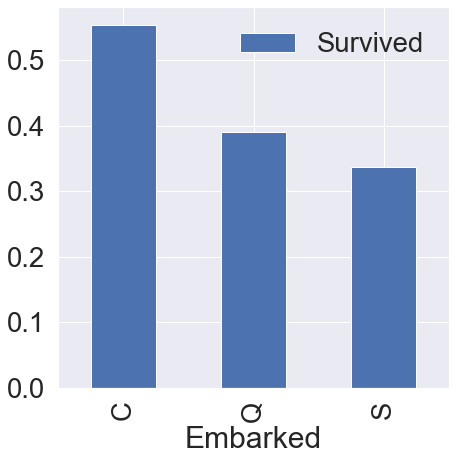

In [196]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True,).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

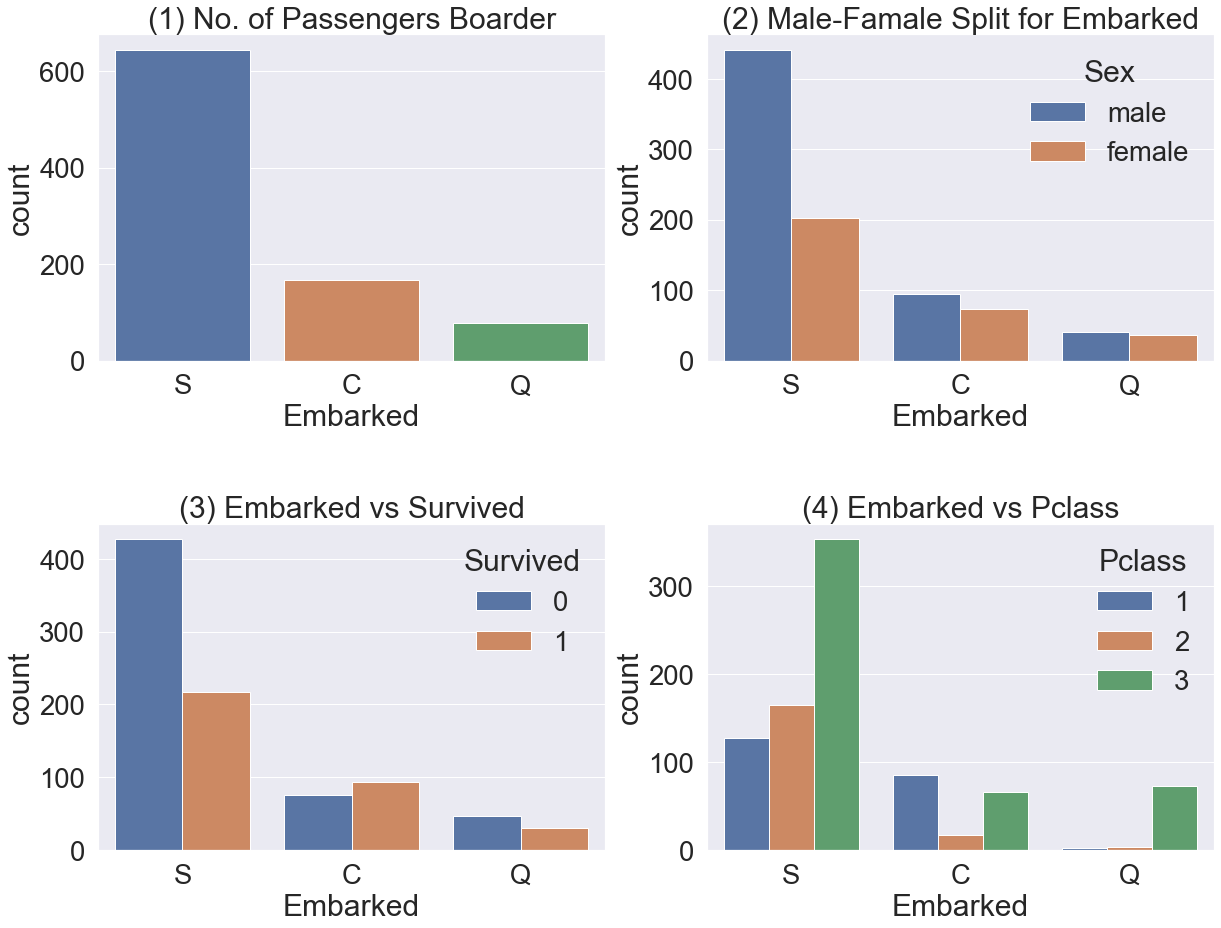

In [197]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarder')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Famale Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

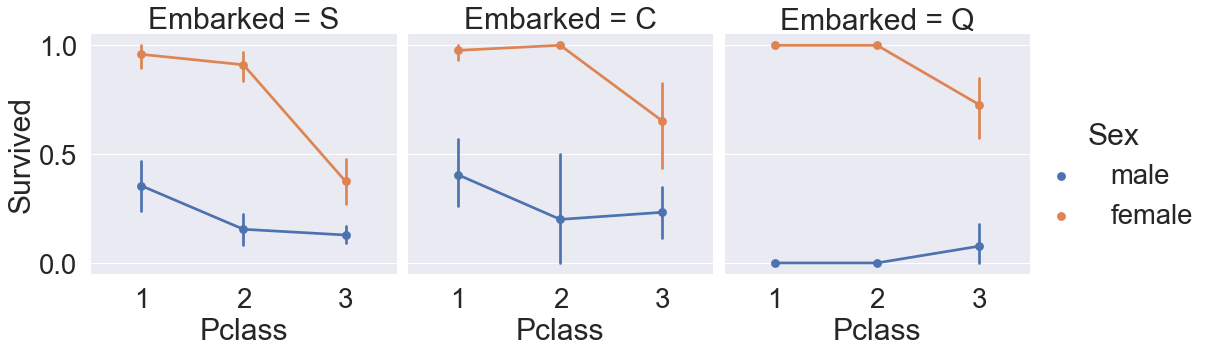

In [337]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df_train)
plt.show()

- Embarked 별 생존율은 C, Q, S 순으로 컸다.
    - C는 1클래스의 비율이 가장 많아서 생존율이 크다고 추측
    - S는 3클래스의 비율이 가장 많이서 생존율이 낮다고 추측

### 07. Familt - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp + Parch를 합하면 Family가 될것이다.

In [365]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [199]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


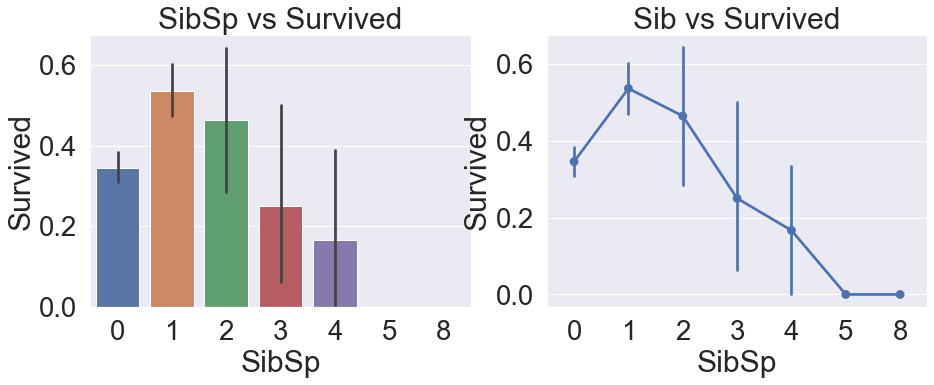

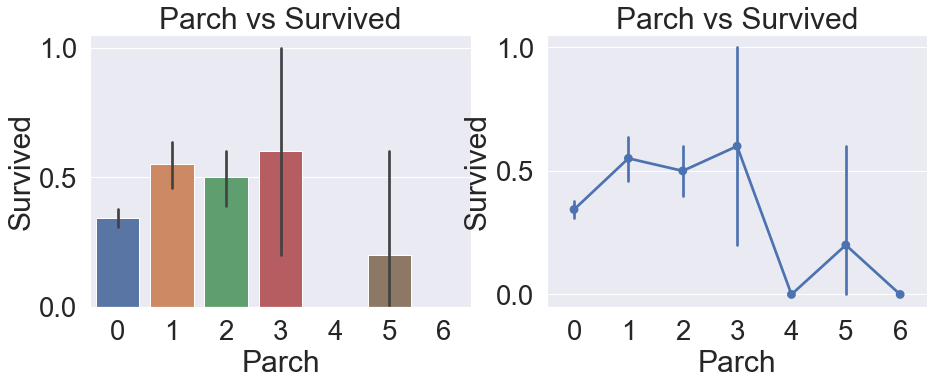

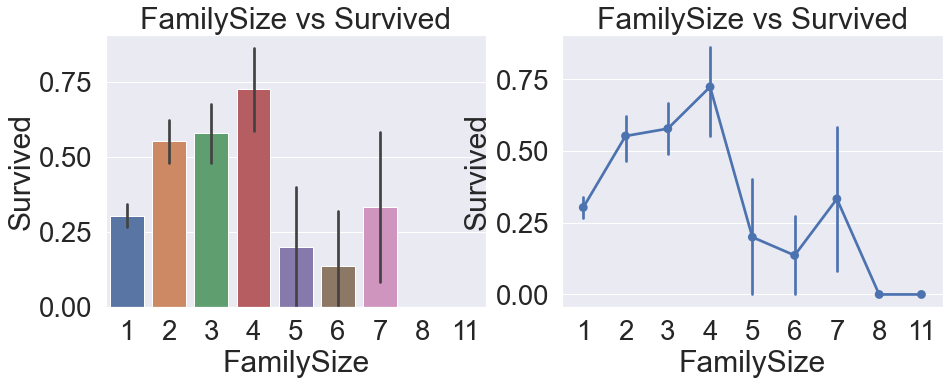

In [366]:
f, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot('SibSp', 'Survived', data=df_train, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# sns.factorplot('SibSp', 'Survived', data=df_train, ax=ax[1])
sns.pointplot('SibSp', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sib vs Survived')
# plt.close(2)
plt.show()

f, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot('Parch', 'Survived', data=df_train, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

f, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot('FamilySize', 'Survived', data=df_train, ax=ax[0])
ax[0].set_title('FamilySize vs Survived')

sns.pointplot('FamilySize', 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('FamilySize vs Survived')
plt.show()

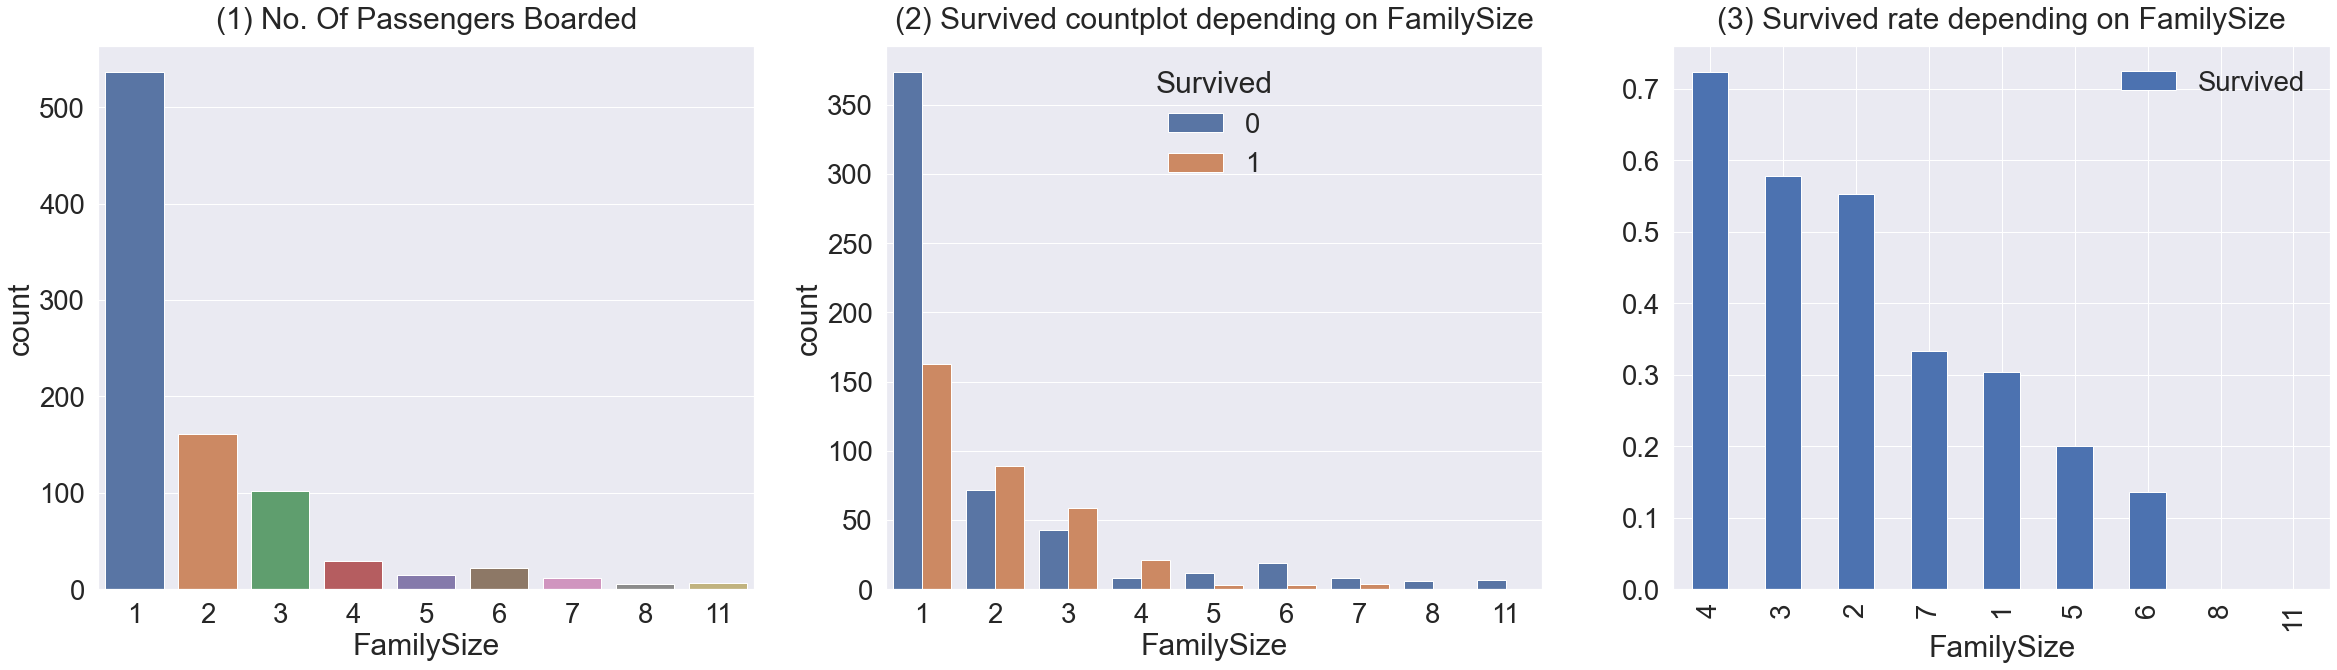

In [367]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',
                                                                                               ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족수는 1~11로 분포해있고, 보통 1명이다.
- 가족수가 1명인 사람이 가장 많이 살아남았다.
- 가족수가 4명인 사람이 생존율이 높았다.

In [224]:
df_train[df_train['Age']<=15][['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
4,0.916667
3,0.875000
2,0.846154
1,0.666667
7,0.250000
5,0.000000
6,0.000000
8,0.000000


In [223]:
df_train[(df_train['Age']<=15)&(df_train['FamilySize']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,1
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,1
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,1
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1


- 아이의 생존확률이 높아서,,, 아이만 따로 뽑아서 생존확률을 보려했는데! 5살인데 가족의수가 없는 애가 있었다?

### 08. Fare

In [243]:
print(df_train['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


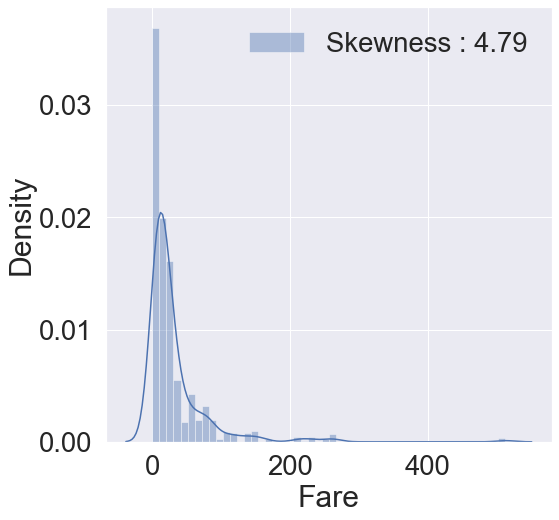

In [369]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭적이다. 
- 몇개없는 outlier에 대해서 민감하게 반응한다면, 실제 예측 ㅣ에 좋지 못한 결과를 부를 수 있다.

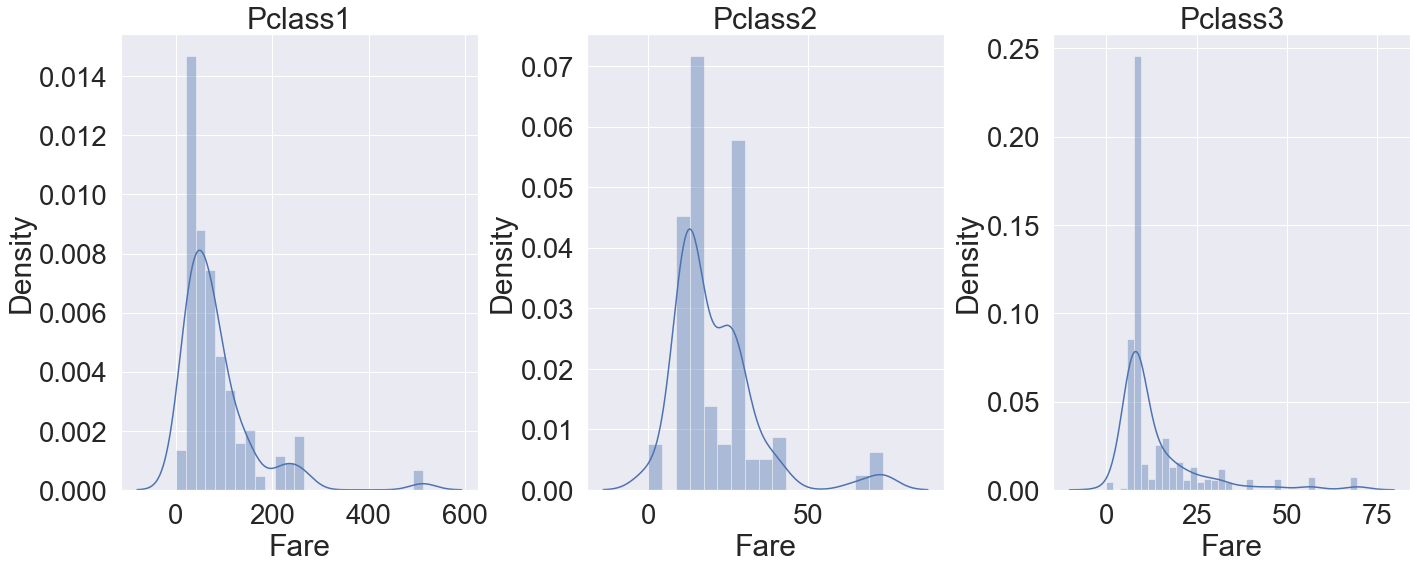

In [374]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
g = sns.distplot(df_train[df_train['Pclass']==1]['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax[0])
ax[0].set_title('Pclass1')
# g = g.legend(loc='best')
g = sns.distplot(df_train[df_train['Pclass']==2]['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax[1])
ax[1].set_title('Pclass2')
g = sns.distplot(df_train[df_train['Pclass']==3]['Fare'], label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax[2])
ax[2].set_title('Pclass3')
plt.tight_layout()

- 1클래스에서의 가격이 아주 비싸게 준 경우가 많다.
- 확인해볼거 : 가족별 Fare - 같이온사람은 돈을안내지않았을까,, 해서했는데 그러진않은것 같다

In [378]:
df_train[df_train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,FamilySize
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1


- Fare를 안낸사람은 뭘까

In [229]:
print(df_train['Fare'].isnull().sum())
print(df_test['Fare'].isnull().sum())

0
1


In [250]:
df_train_log = df_train.copy()
df_train_log['Fare'] = df_train_log['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# print(df_train_log['Fare'].describe())
# print(df_train_log['Fare'].describe())

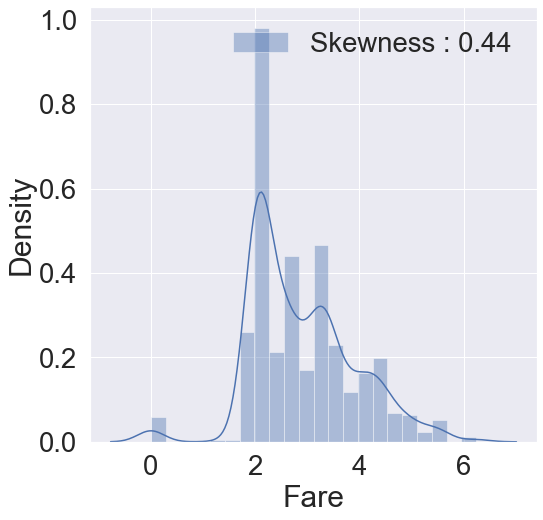

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train_log['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train_log['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [254]:
df_train_log = df_train.copy()
df_train_log['Fare'] = np.log1p(df_train_log['Fare'])

0.3949280095189306


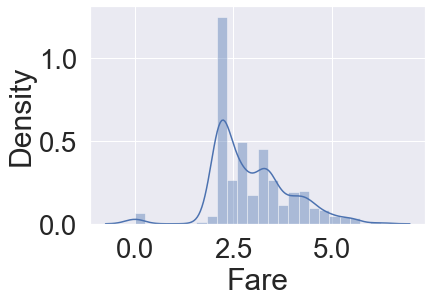

In [272]:
# print(df_train_log['Fare'].describe())
print(df_train_log['Fare'].skew())
sns.distplot(df_train_log['Fare']);

In [256]:
df_train_sqrt = df_train.copy()
df_train_sqrt['Fare'] = np.sqrt(df_train_sqrt['Fare'])

2.08500441820235


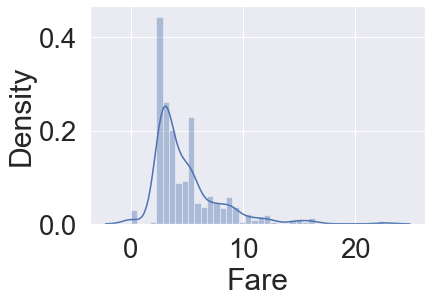

In [273]:
# print(df_train_sqrt['Fare'].describe())
print(df_train_sqrt['Fare'].skew())
sns.distplot(df_train_sqrt['Fare']);

In [265]:
from scipy import stats

In [281]:
df_train_boxcox = df_train.copy()
# df_train_boxcox['Fare'] = np.sqrt(df_train_boxcox['Fare'])
df_train_boxcox['Fare'] = pd.Series(stats.boxcox(df_train_boxcox['Fare']+0.0001)[0])
# df_boxcox = pd.Series(stats.boxcox(df_train['LotArea'])[0])

0.3600406389084343


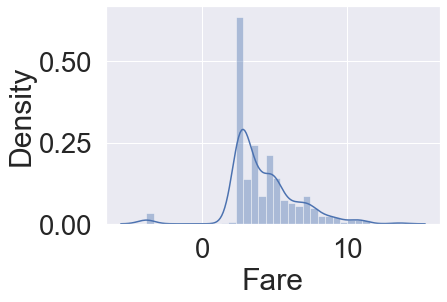

In [282]:
# print(df_train_boxcox['Fare'].describe())
print(df_train_boxcox['Fare'].skew())
sns.distplot(df_train_boxcox['Fare']);

- Log, squart, boxcox 로 데이터 비대칭을 해결해보기위해 테스트해보았다.
- boxcox가 제일 비대칭을 많이 해결해준다
- boxcox는 0이 있으면 안돼서 +1해주었당.. 0.0001 이렇게 더해도 되긴하는데, 그럼 log와 비슷한 값이 나온다.

In [339]:
pd.crosstab([df_train['Embarked'], df_train['Pclass']], [df_train['Sex'], df_train['Survived']], margins=True).style.background_gradient(cmap='summer_r')

# Correlations

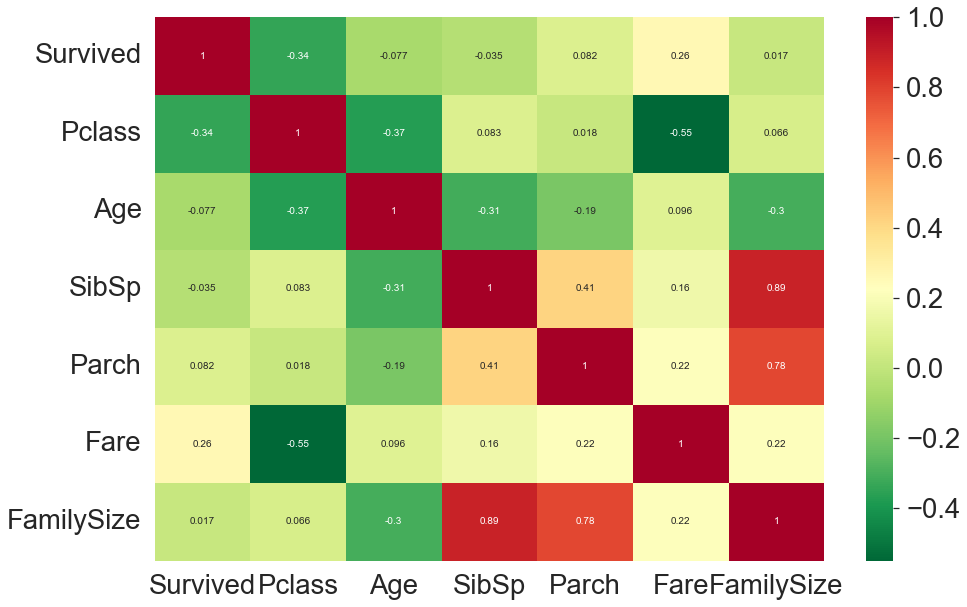

In [382]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.drop('PassengerId', axis=1).corr(), annot=True, cmap='RdYlGn_r')
plt.show()

- SibSp, Parch는 0.41의 상관성을 가지고 있다.


# Preprocessing

### 1. Name, Age

- age null 값 채워주기 위해 성별(직책?) 나이평균구하기

In [317]:
df_train['initial'] = 0
for i in df_train:
    df_train['initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [318]:
df_train['initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: initial, dtype: object

In [319]:
df_train['initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: initial, dtype: int64

In [320]:
df_train['initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [322]:
df_train[df_train['initial'].isin(['Mr', 'Mrs', 'Miss', 'Master']) == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,Rev
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Rev
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Major


- Sex를 보고 각 initial에 대해서 통합해주었다.

In [296]:
pd.crosstab(df_train[df_train['initial'].isin(['Mr', 'Mrs', 'Miss', 'Master']) == False]['initial'], 
            df_train[df_train['initial'].isin(['Mr', 'Mrs', 'Miss', 'Master']) == False]['Sex'], margins=True).style.background_gradient(cmap='summer_r')

Sex,female,male,All
initial,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Mlle,2,0,2


In [307]:
df_train['initial'].replace(['Countess','Lady','Mlle','Mme','Ms'], ['Miss','Miss','Miss','Miss','Miss'], inplace=True)
df_train['initial'].replace(['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt','Jonkheer'], ['Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr'], inplace=True)

In [308]:
df_train['initial'].value_counts()

Mr        538
Miss      188
Mrs       125
Master     40
Name: initial, dtype: int64

In [310]:
df_train.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      22.105263
Mr        33.022727
Mrs       35.898148
Name: Age, dtype: float64

In [313]:
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.initial=='Master'), 'Age'] = 5

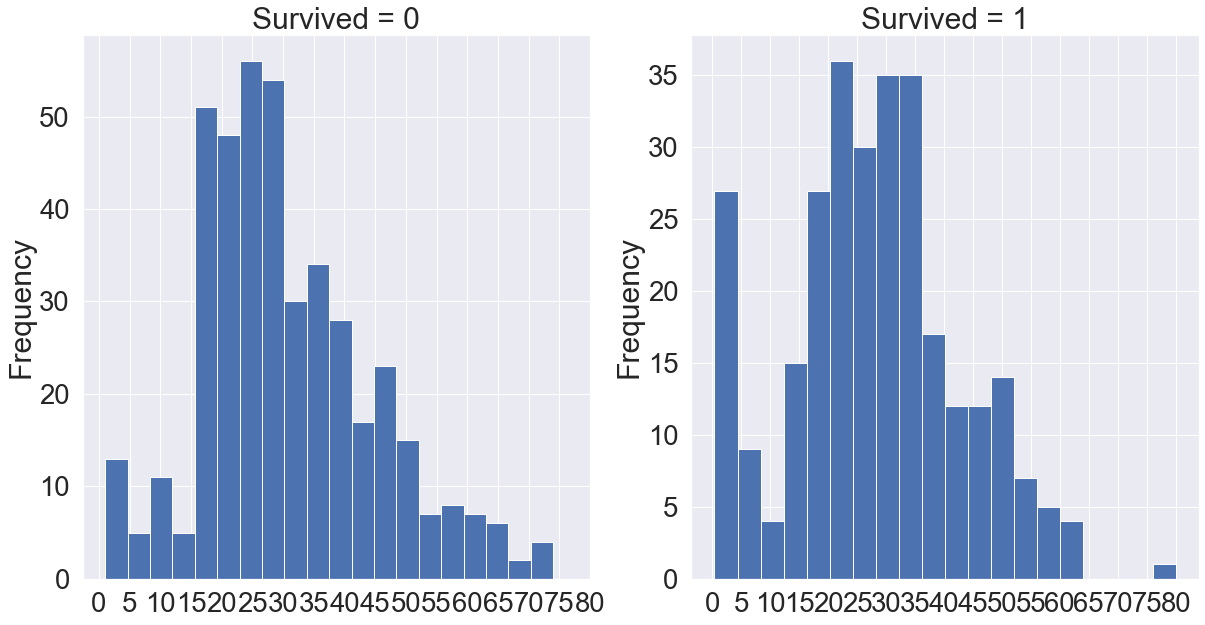

In [332]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0], bins=20)
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1], bins=20)
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()